In [1]:
#Imports

import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

#Import ML models:

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV  
from sklearn.metrics import accuracy_score
from sklearn.model_selection import validation_curve


In [2]:
#Load and confirm DataFrame

df = pd.read_csv('../data/processed/preprocessed_telco_data.csv')
df.head()

,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,normalized_tenure,normalized_MonthlyCharges,normalized_TotalCharges,gender_Male,...,TechSupport_No internet service,StreamingTV_1,StreamingTV_No internet service,StreamingMovies_1,StreamingMovies_No internet service,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,0,1,0,0.000000,0.115423,0.001275,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0.464789,0.385075,0.215867,1,...,0,0,0,0,0,1,0,0,0,1
2,0,0,0,1,1,1,0.014085,0.354229,0.010310,1,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0.619718,0.239303,0.210241,1,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,1,1,1,0.014085,0.521891,0.015330,0,...,0,0,0,0,0,0,0,0,1,0


All data is there.  I will now proceed to model.

Churn is a classic classification problem.  One wishes to predict which customers are most atrisk of churning in order to targetthose customers with preventative measures.  In order to make this prediction, I will fit the model to my DataFrame. One thing I will keep in mind when modeling, is my data is slightly imbalanced - Churn is the minority class at 25 percent, and non-Churn is the majority class at 75%.

However, before I begin modeling I must confirm my optimal feature set.  I will use Random Forest Classifier to discern feature importance.

In [3]:
#Train-Test Split (Cont) defining X and y('Churn')
#Stratifying Y variable to ensure same proportion of classes to original dataset. 
#This is particularly useful when dealing with imbalanced datasets

X = df[['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PaperlessBilling', 'normalized_tenure',
       'normalized_MonthlyCharges', 'normalized_TotalCharges', 'gender_Male',
       'MultipleLines_1', 'MultipleLines_No phone service',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'OnlineSecurity_1', 'OnlineSecurity_No internet service',
       'OnlineBackup_1', 'OnlineBackup_No internet service',
       'DeviceProtection_1', 'DeviceProtection_No internet service',
       'TechSupport_1', 'TechSupport_No internet service', 'StreamingTV_1',
       'StreamingTV_No internet service', 'StreamingMovies_1',
       'StreamingMovies_No internet service', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']].values
y = df['Churn'].values

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

I. Feature Selection

In [4]:
# Use feature importance to choose a few feature sets via Random Forest

from sklearn.ensemble import RandomForestClassifier

#Fit Random Forest Classifier with 100 Decision Trees.

rf = RandomForestClassifier(bootstrap=True,n_estimators=100,criterion='entropy')
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'entropy'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [5]:
#Retrieve feature importance values 
rf.feature_importances_

array([0.02157654, 0.02425472, 0.01882147, 0.00415371, 0.02589481,
       0.160047  , 0.16635506, 0.19026206, 0.02951625, 0.02030601,
       0.00431749, 0.01269218, 0.03356641, 0.0242434 , 0.00559603,
       0.02230261, 0.00445853, 0.01916445, 0.00649988, 0.02039076,
       0.00369472, 0.01791914, 0.00351593, 0.01898291, 0.00681068,
       0.02209077, 0.05236416, 0.01520001, 0.03167387, 0.01332845])

Text(0.5, 1.0, 'Feature Importance')

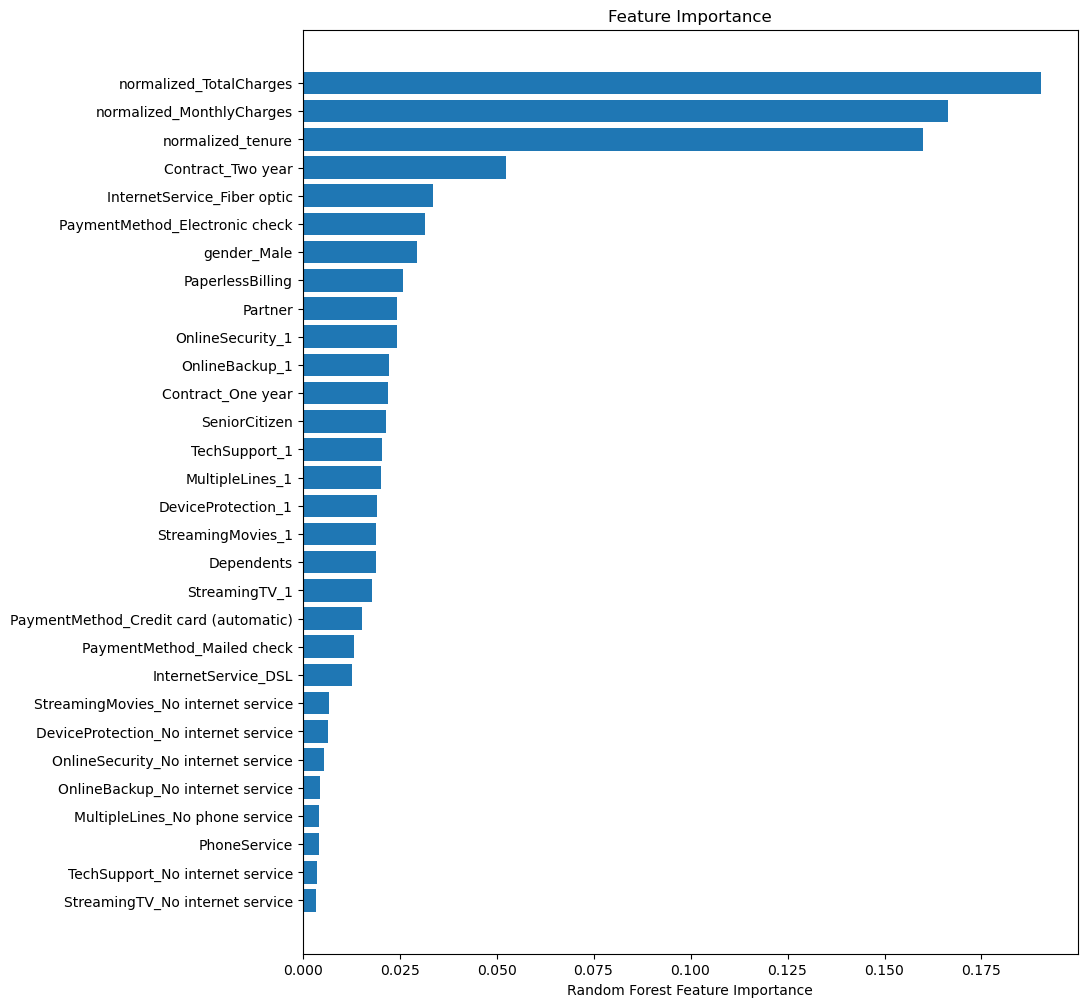

In [7]:
#Sort and Plot Important Features

feature_names = ['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PaperlessBilling', 'normalized_tenure',
       'normalized_MonthlyCharges', 'normalized_TotalCharges', 'gender_Male',
       'MultipleLines_1', 'MultipleLines_No phone service',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'OnlineSecurity_1', 'OnlineSecurity_No internet service',
       'OnlineBackup_1', 'OnlineBackup_No internet service',
       'DeviceProtection_1', 'DeviceProtection_No internet service',
       'TechSupport_1', 'TechSupport_No internet service', 'StreamingTV_1',
       'StreamingTV_No internet service', 'StreamingMovies_1',
       'StreamingMovies_No internet service', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']

# Sort the feature importances
sorted_idx = rf.feature_importances_.argsort()

# Use the sorted indices to get the feature names in the right order
sorted_features = [feature_names[i] for i in sorted_idx]

# Plot using the sorted feature names and importances
plt.figure(figsize=(10, 12))  # Adjust figure size for better visibility
plt.barh(sorted_features, rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Feature Importance")

I will assess ALL my features, my top 10 features, and my top 5 features.  I will use F1 as my metric because a single number capturing the trade-off between: catching churners (recall) and not spamming non-churners (precision).

In [61]:
#Apply RF to the training data with ALL Features and test performance via confusion matrix.

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

rf = RandomForestClassifier(bootstrap=True,n_estimators=100,criterion='entropy')
rf.fit(X_train, y_train)

#Predict using the model:

y_predict_rf = rf.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_rf)
print(cnf_matrix)
print(f1_score(y_predict_rf,y_test))


[[1392  157]
 [ 284  277]]
0.5567839195979899


In [63]:
#Apply RF to the training data with top 10 Features and test performance via confusion matrix.

#Train-Test Split with top 10 features

top_ten = ['normalized_MonthlyCharges', 'normalized_TotalCharges', 'normalized_tenure', 'Contract_Two year', 'InternetService_Fiber optic', 'gender_Male', 'PaymentMethod_Electronic check', 
           'OnlineSecurity_1', 'PaperlessBilling',  'Contract_One year', 'Partner']


X = df[top_ten].values
y = df['Churn'].values

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)


rf = RandomForestClassifier(bootstrap=True,n_estimators=100,criterion='entropy')
rf.fit(X_train, y_train)


#Predict using the model:

y_predict_rf_10 = rf.predict(X_test)

#Confusion matrix:

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_rf_10)
print(cnf_matrix)
print(f1_score(y_predict_rf_10,y_test))

[[1375  174]
 [ 302  259]]
0.5211267605633803


In [64]:
#Apply RF to the training data with top 5 Features and test performance via confusion matrix.

#Train-Test Split with top 5 features

top_five = ['normalized_MonthlyCharges', 'normalized_TotalCharges', 'normalized_tenure', 'Contract_Two year', 'InternetService_Fiber optic'] 


X = df[top_five].values
y = df['Churn'].values

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)


rf = RandomForestClassifier(bootstrap=True,n_estimators=100,criterion='entropy')
rf.fit(X_train, y_train)


#Predict using the model:

y_predict_rf_5 = rf.predict(X_test)

#Confusion matrix:

cnf_matrix = confusion_matrix(y_test, y_predict_rf_5)
print(cnf_matrix)
print(f1_score(y_predict_rf_5,y_test))

[[1336  213]
 [ 306  255]]
0.4956268221574344


From testing different feature sets, one can see that the f1 score is highest with the "All" feature set. This means taht all features are important when it comes to modeling.  No features necessarily introduce noies into the model. Moving forward, I will use ALL Featuers for my modeling.

2. MODELING

Since this is a classification problem, I will use the following models: Logistic Regression, Random Forest, and K-nearest neighbors, and XG Boost.  I'm predicting that XG Boost will give the best performance so it is the most robust against imbalanced data.
For each model, I will perform hyperparameter tuning via GridsearchCV in order to get the best parameters for each model.
For scoring, I will use "roc_auc."  This metric assesses how well the model ranks churners higher than non-churners across all possible decision thresholds. Thus, the model with the best "roc-auc" score will be deemed my best model.

In [67]:
#All the features for Train-Test Splitting

X = df[['SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'PaperlessBilling', 'normalized_tenure',
       'normalized_MonthlyCharges', 'normalized_TotalCharges', 'gender_Male',
       'MultipleLines_1', 'MultipleLines_No phone service',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'OnlineSecurity_1', 'OnlineSecurity_No internet service',
       'OnlineBackup_1', 'OnlineBackup_No internet service',
       'DeviceProtection_1', 'DeviceProtection_No internet service',
       'TechSupport_1', 'TechSupport_No internet service', 'StreamingTV_1',
       'StreamingTV_No internet service', 'StreamingMovies_1',
       'StreamingMovies_No internet service', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check']].values
y = df['Churn'].values

X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21, stratify=y)

All data has been split into a training and test set.  Seventy percent of the data is for training and thirty percent is for testing.  Stratify = y signifies that the training and test sets will have the same class distribution as the original dataset.  This will prevent a biased train/test split and keeps the class imbalance consistent.

For each model, I will train the model to the data via GridSearchCV.  This will tune the hyperparameters of the model and return a cross-validation score, as well as acknowledging the best hyperparameters for my respective model.  Lastly, and most imporantly, I will evaulate my model on the test set.  I will use the ROC_AUC as my metric for assessing performance.


2A. Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold


kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100], # Test different regularization strengths
    'penalty': ['l1', 'l2'],               # Test L1 and L2 regularization
    'solver': ['liblinear', 'saga'],       # Solvers supporting both L1/L2 (saga supports elasticnet too)
    'max_iter': [1000, 5000]               # Increased iterations for convergence
}

#Instatiate Logistic Regression
Logreg = LogisticRegression(class_weight='balanced')

Logreg_cv = GridSearchCV(Logreg, param_grid, cv = kf, scoring='roc_auc')

# Fit the model on the trainng data.
Logreg_cv.fit(X_train, y_train)

print(Logreg_cv.best_params_, Logreg_cv.best_score_)

{'C': 10, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'saga'} 0.8451122463652926


One thing to note is when I instantiated the model, I set the class_weight parameter to 'balanced' in order to account for my imbalanced dataset.

Also, my cv score was .8451

In [13]:
#Evaluate on the test set

Logreg_test_score = Logreg_cv.score(X_test, y_test)
print(Logreg_test_score)

0.8436671810575278


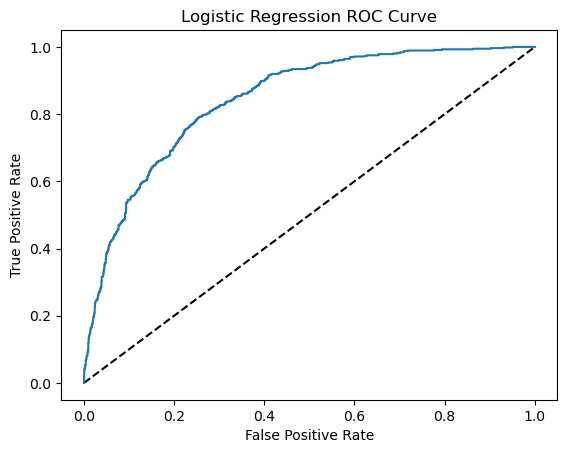

In [14]:
#Plotting the ROC Curve

from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

#Predicting Probabilities
y_pred_probs = Logreg_cv.predict_proba(X_test)

# Extract only the probabilities for the positive class (class 1)
# which is the second column (index 1) of the probability matrix
y_pred_probs_positive = y_pred_probs[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs_positive)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)  # Fixed 'plot' to 'plt'
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()


In [15]:
#Logistic Regression ROC_AUC Score:
print(roc_auc_score(y_test, y_pred_probs[:, 1]))

0.8436671810575278


One sees a ROC_AUC score at 84.37% and a healthy curve. 

2b. Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider at each split
    'max_depth': [10, 20, 30, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

#Instatiate Random Forest
rf = RandomForestClassifier()

rf_cv = GridSearchCV(rf, param_grid, cv = kf, scoring='roc_auc')

# Fit the model on the trainng data.
rf_cv.fit(X_train, y_train)


,estimator,RandomForestClassifier()
,param_grid,"{'bootstrap': [True, False], 'max_depth': [10, 20, ...], 'max_features': ['sqrt', 'log2', ...], 'min_samples_leaf': [1, 2, ...], ...}"
,scoring,'roc_auc'
,n_jobs,None
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,200


In [17]:
#Best params and score:
print(rf_cv.best_params_, rf_cv.best_score_)

{'bootstrap': True, 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200} 0.8462540500360077


These are the best hyperparameters and 0.842 is my cv score.

In [18]:
#Evaluate on the test set

rf_test_score = rf_cv.score(X_test, y_test)
print(rf_test_score)

0.8441056215901468


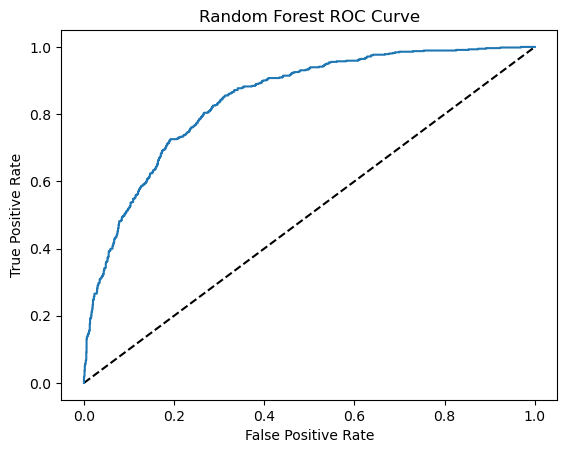

In [19]:
#Plotting the ROC Curve

#Predicting Probabilities
y_pred_probs_rf = rf_cv.predict_proba(X_test)

# Extract only the probabilities for the positive class (class 1)
# which is the second column (index 1) of the probability matrix
y_pred_probs_positive_rf = y_pred_probs_rf[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs_positive_rf)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.show()

In [20]:
#Random Forest -- ROC_AUC Score:
print(roc_auc_score(y_test, y_pred_probs_rf[:, 1]))

0.8441056215901468


One sees a ROC_AUC score at 84.41% and a healthy curve.  This performed better than Logistic Regression.

2C. K-Nearest Neighbors

In [21]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': list(range(1, 31)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

#Instatiate KNN
knn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn, param_grid, cv = kf, scoring='roc_auc')

# Fit the model on the training data.
knn_cv.fit(X_train, y_train)

print(knn_cv.best_params_, knn_cv.best_score_)

{'metric': 'manhattan', 'n_neighbors': 29, 'weights': 'uniform'} 0.83100493663447


These are the best hyperparameters and .831 is my cv score.

In [22]:
#Evaluate on the test set

knn_test_score = knn_cv.score(X_test, y_test)
print(knn_test_score)

0.8255231078874415


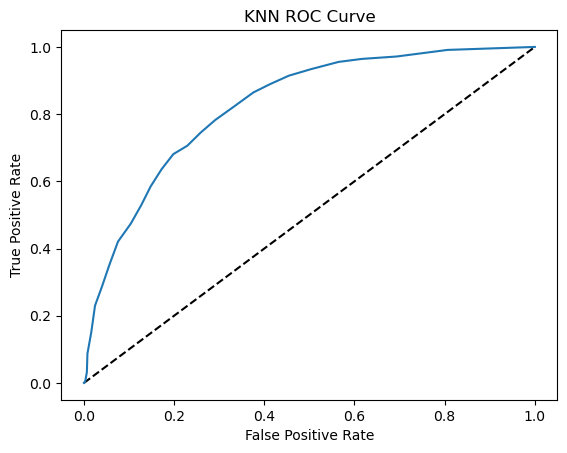

In [23]:
#Plotting the ROC Curve

#Predicting Probabilities
y_pred_probs_knn = knn_cv.predict_proba(X_test)

# Extract only the probabilities for the positive class (class 1)
# which is the second column (index 1) of the probability matrix
y_pred_probs_positive_knn = y_pred_probs_knn[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs_positive_knn)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)  # Fixed 'plot' to 'plt'
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.show()

In [26]:
#KNN -- ROC_AUC Score:
print(roc_auc_score(y_test, y_pred_probs_knn[:, 1]))

0.8255231078874415


One sees a ROC_AUC score of 82.55% and a slightly weaker curve.  This performed worse than Logistic Regression and Random Forest.

2D. XGBoost

In [28]:
from xgboost import XGBClassifier

param_grid = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1], # Also known as 'eta'
    'n_estimators': [100, 500, 1000]
}

#Instatiate XGBoost
xgb = XGBClassifier()

xgb_cv = GridSearchCV(xgb, param_grid, cv = kf, scoring='roc_auc')

# Fit the model on the training data.
xgb_cv.fit(X_train, y_train)

print(xgb_cv.best_params_, xgb_cv.best_score_)

{'colsample_bytree': 0.8, 'gamma': 5, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 5, 'n_estimators': 1000, 'subsample': 0.8} 0.8517897686435789


These are the best hyperparameters of those tested and my cv score is 0.8518, much better than any of the previous models.

In [29]:
#Evaluate on the test set

xgb_test_score = xgb_cv.score(X_test, y_test)
print(xgb_test_score)

0.8448311773796907


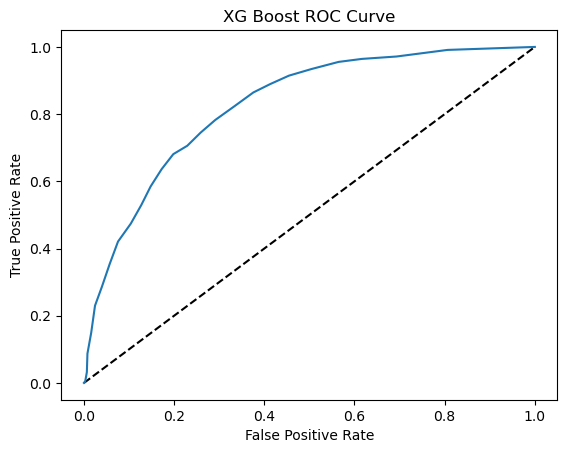

In [30]:
#Plotting the ROC Curve

#Predicting Probabilities
y_pred_probs_xgb = xgb_cv.predict_proba(X_test)

# Extract only the probabilities for the positive class (class 1)
# which is the second column (index 1) of the probability matrix
y_pred_probs_positive_xgb = y_pred_probs_xgb[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs_positive_knn)

plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr)  # Fixed 'plot' to 'plt'
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XG Boost ROC Curve')
plt.show()

One sees a ROC_AUC score of 84.5% and a healthy curve.  I will plot all 4 curves against each other for a better visual representation of which model performed the best.

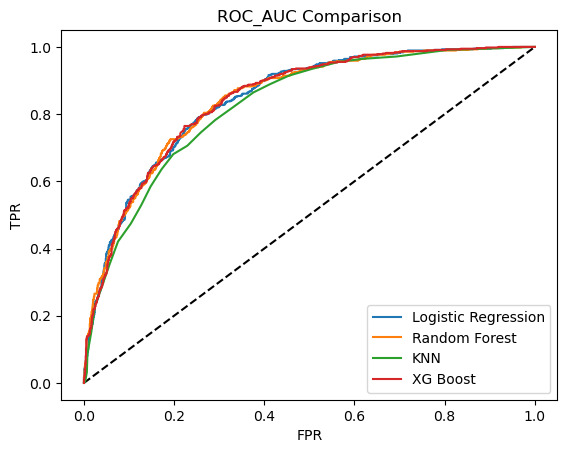

In [31]:
#ROC Comparison Curve


y_pred_probs = Logreg_cv.predict_proba(X_test)[:,1]
fpr1 , tpr1, thresholds1 = roc_curve(y_test, y_pred_probs_positive)


y_pred_probs_rf = rf_cv.predict_proba(X_test)[:,1]
fpr2 , tpr2, thresholds2 = roc_curve(y_test, y_pred_probs_positive_rf)


y_pred_probs_knn = knn_cv.predict_proba(X_test)[:,1]
fpr3 , tpr3, thresholds3 = roc_curve(y_test, y_pred_probs_positive_knn)

y_pred_probs_xgb = xgb_cv.predict_proba(X_test)[:,1]
fpr4 , tpr4, thresholds4 = roc_curve(y_test, y_pred_probs_positive_xgb)

plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Logistic Regression")
plt.plot(fpr2, tpr2, label= "Random Forest")
plt.plot(fpr3, tpr3, label= "KNN")
plt.plot(fpr4, tpr4, label= "XG Boost")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('ROC_AUC Comparison')
plt.show()

Though it may be hard to see, from the plot one can discern XG Boost as the best model to use moving forward.  Overall,  the CV Scores and ROC_AUC scores ranged in the low to mid 80s that all four models had good to excellent discriminatory power.

The model that scored the highest was XG Boost with an ROC_AUC of 84.5%.  Thus, XG Boost is my best model.  I will now further assess its performance via confusion matrix and classification report.

In [68]:
#Confusion Matrix and Classification Report for XG Boost

from sklearn.metrics import classification_report, confusion_matrix

y_pred_xgb = xgb_cv.predict(X_test)

print(confusion_matrix(y_test, y_pred_xgb))

[[1391  158]
 [ 259  302]]


In [34]:
#Classification Report

print(classification_report(y_test,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.66      0.54      0.59       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.80      2110



Overall, the model correctly predicts 80 percent of the samples(Accuracy).  Because my classes are imbalanced, accuracy alone can be misleading.  Thus, the other metrics must be considered.  With regard to class 0 ('No Churn') performance, Precision, Recall and F-1 score all were very strong.  We can conclude that the model is very good at detecting No Churn.  However, the model struggles with class 1 (Churn).
One can see it only identifies %54 of actual class-1 cases.  This is  not surprising since Churn(Class 1) is in the minority class.  Churn recall is the main issue.  The model missed many class-1 instances.

Thus, the other metrics must be considered.  With regard to class 0 ('No Churn') performance, Precision, Recall and F-1 score all were very strong.  We can conclude that the model is very good at detecting No Churn.  However, the model struggles with class 1 (Churn).
One can see it only identifies %54 of actual class-1 cases.  This is  not surprising since Churn(Class 1) is in the minority class.  Churn recall is the main issue.  The model missed many class-1 instances.

Optimizing the decision threshold is a way to improve class 1 performance.  By optimizing the decision threshold, I will find the cutoff that
gives the best trade-off between precision and recall for Churn(class 1), aka the minority class. First I will compute predicted probabilities from my model.

3. Model Optimization through Decision threshold Tuning

In [36]:
#Compute predicted probabilities

y_proba_xgb = xgb_cv.predict_proba(X_test)[:, 1]

I will try all thresholds frmo 0.0-->1.0 and compute precision/recall/F1

In [42]:
#Evaluate F1 score across thresholds


from sklearn.metrics import precision_score, recall_score, f1_score

thresholds = np.arange(0.0, 1.01, 0.01)
precisions, recalls, f1s = [], [], []

for t in thresholds:
    y_pred_t = (y_proba_xgb >= t).astype(int)
    precisions.append(precision_score(y_test, y_pred_t))
    recalls.append(recall_score(y_test, y_pred_t))
    f1s.append(f1_score(y_test, y_pred_t))

best_t = thresholds[np.argmax(f1s)]
best_f1 = np.max(f1s)
best_t, best_f1
(print(best_t, best_f1))

0.31 0.639344262295082


/opt/anaconda3/envs/ml-clean/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/ml-clean/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/anaconda3/envs/ml-clean/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/an

In [ ]:
The best threshold is 0.31 and the best F1 score is 0.64

With this optimized threshold, I will make a new prediction and assess performance via classifiction report.

In [44]:
#Converting probabilities from XGBoost into final class predictions using custom Best threshold.

y_pred_opt = (y_proba_xgb >= best_t).astype(int)

In [45]:
#New Classification Report...

print(classification_report(y_test, y_pred_opt))


              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1549
           1       0.55      0.76      0.64       561

    accuracy                           0.77      2110
   macro avg       0.72      0.77      0.74      2110
weighted avg       0.81      0.77      0.78      2110



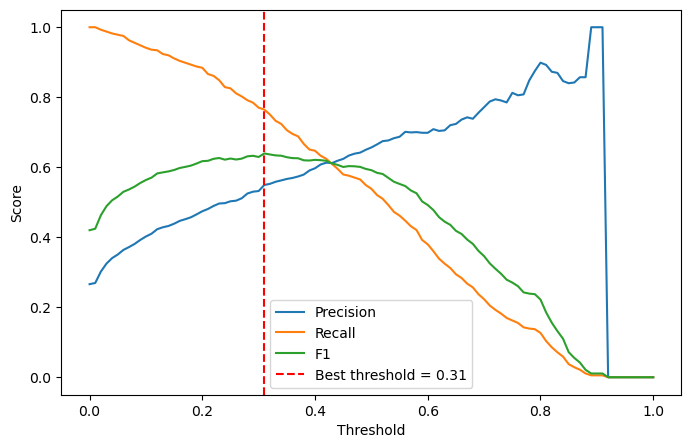

In [43]:
#Plotting Metrics to visualize threshold

plt.figure(figsize=(8,5))
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, f1s, label='F1')
plt.axvline(best_t, color='red', linestyle='--', label=f'Best threshold = {best_t:.2f}')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()

After optimized threshold tuning, recall for class 1 was dramatically improved to 76%.  The model has caught many more true positives.
F1 score was also improved to 64% from 59%.  However, precision is now lower.  In other words, the model generates more false positives.  This is
a common side effect of raising recall.

In churn prediction, higher recall for the churners takes precedence over higher precision because we want fewer false negatives.  If a customer is missed who will churn, there is no chance to intervene and retain them.
A higher precision means fewer false positives.  Sending an intervention and retention email to a customer who was not actually going to churn is not a big economic loss.

Thus, our XG Boost Classifier with a tuned decision threshold of 0.31 is our optimal model.